# Dublin Air Pollution
#### [ Programming for Data Analysis Project GMIT 2020 ]
<br>

<img align="left" width="340" src="http://airtoxenviro.com/wp-content/uploads/2015/05/Power-Plant-Clip-Art.png">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
_Completed by:_ Olga Rozhdestvina (G00387844@gmit.ie)

___

Air pollution is a mixture of solid and gas particles in the air. Every year it causes approximately seven million premature deaths [1]. As air pollution levels increase, there has been a growing interest in modelling the relationship between atmospheric concentration of pollutants and various meteorological conditions in the area studied. [2]

The Air Quality Index, or AQI, is used for measuring the real-time pollution. The higher it is, the greater the level of air pollution. AQI is based on measurement of:

* **NO2** - nitrogen dioxide, 
* **PM10** - particulate matter with a diameter of less than 2.5 micrometers,
* **PM2.5** - particulate matter with a diameter of less than 2.5 micrometers,
* **O3** - ozone,
* **SO2** - sulfur dioxide.

There is a number of meteorological factors that affect AQI. In my analysis I will be looking at wind speed and direction. 

Variables measured for this project: _AQI_ variable is a non-negative integer, _NO2, PM10, PM2.5, O3, SO2, Wind_ are non-negative real numbers with one decimal place and _Wind Direction_ is categorical variable with four possible values: west, north east, north, north west.

> [1] [WHO: Air Pollution](https://www.who.int/health-topics/air-pollution#:~:text=The%20combined%20effects%20of%20ambient,cancer%20and%20acute%20respiratory%20infections.)
<br>
[2] [Joanna A. Kaminska: Probabilistic Forecasting of Nitrogen Dioxide Concentrations at an Urban Road Intersection](https://www.researchgate.net/publication/328978359_Probabilistic_Forecasting_of_Nitrogen_Dioxide_Concentrations_at_an_Urban_Road_Intersection)

___

<br>

#### General Set Up

In [1]:
# Dataframes
import pandas as pd

# Calculations and distributions
import numpy as np

# Distribution fitting.
from scipy import stats

# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# To register the converters
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

%matplotlib inline
register_matplotlib_converters()

In [2]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (15, 9)

___

<br>

#### Original Data.

I have collected data on air pollution in Dublin for 07/12/2020 from [IQAir](https://www.iqair.com/) - a website of a Swiss air quality technology company. [3] Data on wind speed and direction was collected from [Met Eireann Forecast](https://www.met.ie/) [4]


> [3] [IQAir: Air quality in Dublin](https://www.iqair.com/us/ireland/leinster/dublin)
<br>
[4] [Met Eireann Forecast in Dublin City](https://www.met.ie/weather-forecast/dublin-city#forecasts)

In [3]:
# Simulate the date range
rng = pd.date_range('07/12/2020', periods=24, freq='H')
rng

DatetimeIndex(['2020-07-12 00:00:00', '2020-07-12 01:00:00',
               '2020-07-12 02:00:00', '2020-07-12 03:00:00',
               '2020-07-12 04:00:00', '2020-07-12 05:00:00',
               '2020-07-12 06:00:00', '2020-07-12 07:00:00',
               '2020-07-12 08:00:00', '2020-07-12 09:00:00',
               '2020-07-12 10:00:00', '2020-07-12 11:00:00',
               '2020-07-12 12:00:00', '2020-07-12 13:00:00',
               '2020-07-12 14:00:00', '2020-07-12 15:00:00',
               '2020-07-12 16:00:00', '2020-07-12 17:00:00',
               '2020-07-12 18:00:00', '2020-07-12 19:00:00',
               '2020-07-12 20:00:00', '2020-07-12 21:00:00',
               '2020-07-12 22:00:00', '2020-07-12 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [4]:
# Original data.
raw_data = {'AQI': [84,74,74,72,72,72,72,72,71,72,72,73,80,74,74,74,74,74,74,76,72,76,68,67],
            'NO2': [32.1,29.7,28.5,26.9,26.1,25.8,26.5,27.3,30.9,41.1,52,55.1,58.3,52,41.7,42.6,41.9,38.7,43.1,37.5,32.4,28.7,27.2,20.6],
            'PM2.5': [28,23,23,22.1,22.2,22.1,22,21.9,21.8,22,22.2,22.4,25.9,23,23.1,23.2,23.1,23.1,22.9,24,22.3,24.1,20.1,19.7],
            'PM10': [36,33,28.1,21.2,21.5,19.8,17.1,16.4,15.1,16.6,21.2,28.6,31.1,25.7,25.5,24.4,30.9,25.9,30.9,32.8,30.7,26.6,21.3,18.4],
            'O3': [1,0.4,0.8,0.4,0.3,0.4,0.7,0.3,0,0.6,0.7,0,0.8,0.8,1.8,1.5,1.1,0.8,0.9,0.8,0.7,1.8,3,4.6],
            'SO2': [5,4.2,4.1,3.9,3.7,4.3,4.8,4.2,4.6,6.6,8.2,9.2,10.6,8.6,6.7,6.8,6.9,6,6.3,5,3.6,4.1,4.1,3.4],
            'Wind': [9,9,9,7,7,7,7,7,6,7,7,9,17,15,15,19,13,17,17,19,19,19,19,22],
            'Wind Direction': ['west','west','west','north west','north west','west','north west','north west','north west','north west','north east','north west','north','north','north west','north west','north west','north west','west','west','west','west','west','west']
           }


# Create a dataframe.
df = pd.DataFrame(raw_data, index=rng)

# Display the dataframe.
df

,AQI,NO2,PM2.5,PM10,O3,SO2,Wind,Wind Direction
2020-07-12 00:00:00,84,32.1,28.0,36.0,1.0,5.0,9,west
2020-07-12 01:00:00,74,29.7,23.0,33.0,0.4,4.2,9,west
2020-07-12 02:00:00,74,28.5,23.0,28.1,0.8,4.1,9,west
2020-07-12 03:00:00,72,26.9,22.1,21.2,0.4,3.9,7,north west
2020-07-12 04:00:00,72,26.1,22.2,21.5,0.3,3.7,7,north west
2020-07-12 05:00:00,72,25.8,22.1,19.8,0.4,4.3,7,west
2020-07-12 06:00:00,72,26.5,22.0,17.1,0.7,4.8,7,north west
2020-07-12 07:00:00,72,27.3,21.9,16.4,0.3,4.2,7,north west
2020-07-12 08:00:00,71,30.9,21.8,15.1,0.0,4.6,6,north west
2020-07-12 09:00:00,72,41.1,22.0,16.6,0.6,6.6,7,north west


___

<br>

#### Analysis of the data set.
First let's have a look at the wind data and then at the pollutant concentration in Dublin City on that day. [5]

> [5] [Stack Overflow: how to get ticks every hour?](https://stackoverflow.com/questions/48790378/how-to-get-ticks-every-hour)

In [5]:
def lineplot(data, suptitle, label):
    
    """ Building lineplot function """
    # Create a figure and a set of subplots.
    fig, ax = plt.subplots()

    # Set a title and a label for y axis.
    fig.suptitle(suptitle)
    ax.set_ylabel(label)

    # Plot data.
    sns.lineplot(data=data,ax=ax).set_title("07.12.2020", y=1.02)

    # Make the x axis display well.
    hours = mdates.HourLocator(interval = 1)
    h_fmt = mdates.DateFormatter('%H:%M:%S')

    # Tick ax axis.
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    
    # Format.
    fig.autofmt_xdate()

    # Show the plot.
    plt.show()

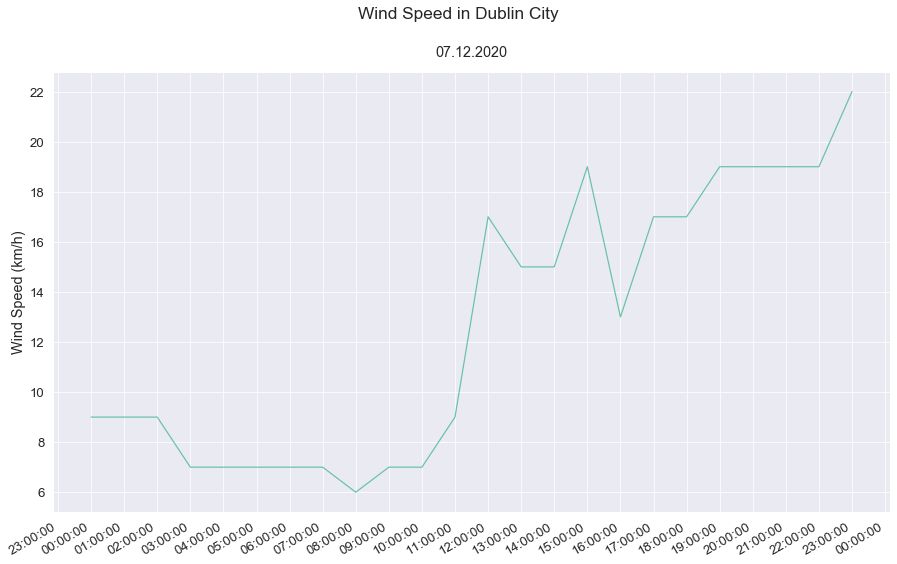

In [6]:
# Call a function to create a plot for wind data.
lineplot(df["Wind"], "Wind Speed in Dublin City", "Wind Speed (km/h)")

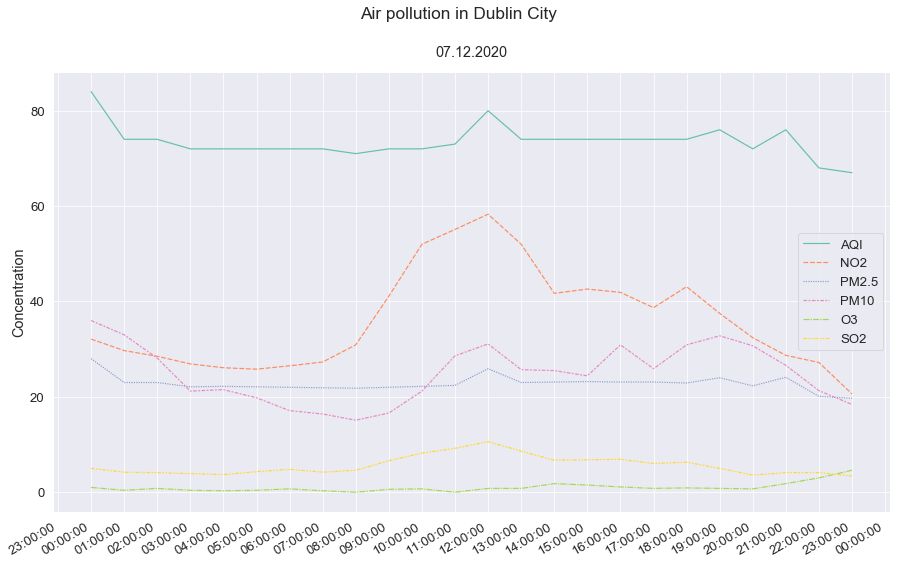

In [7]:
# Plot data for pollutants.
pollutants = df[['AQI','NO2','PM2.5','PM10','O3','SO2']]
lineplot(pollutants, "Air pollution in Dublin City", "Concentration")

<br>

The second plot shows that the primary pollutants are __NO2, PM10, PM2.5__.

NO2 primarily gets in the air from cars, trucks and buses emissions, power plants, and off-road equipment. We can see direct corelation between NO2 concentration and time of the day: it start rising from 7 am and reaches its peack at 12 pm and starts falling at about 7 pm with the traffic coming down. 

The next highest is PM10.  PM10 concentration is due to the same reasons as NO2 (the reason it rises at the same time), but it  is also influenced by the atmospheric conditions. [5] Below is a plot depicting this. [6]

> [5] [Springer Link: Influence of the atmospheric conditions on PM10 concentrations in Poznań, Poland](https://link.springer.com/article/10.1007/s10874-016-9345-5)
<br>
[6] [Stack Overflow: How to change a figure's size in Python Seaborn package
](https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package)

In [8]:
def catplot(x):
    """ Building catplot function """
    # Plot the data.
    g = sns.catplot(x=x, y="Wind", data=df, hue="Wind Direction", kind="bar")
    
    # Set title.
    g.fig.suptitle(f"{x} vs Wind", y=1.02)
    
    # Set size of the plot.
    g.fig.set_size_inches(14, 9)

    # Show the plot.
    plt.show()

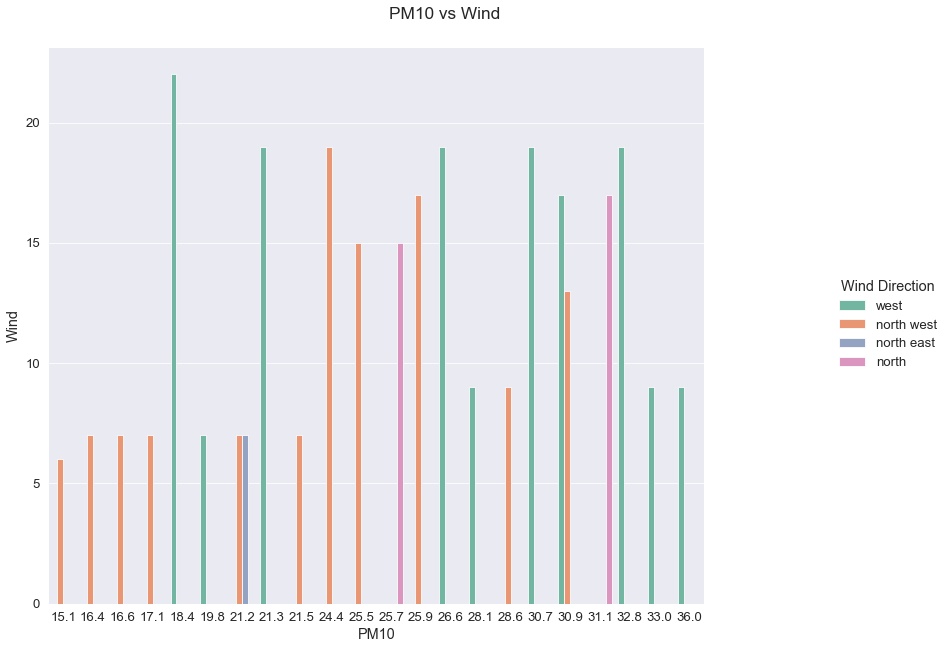

In [9]:
# Plot data for PM10
catplot("PM10")

<br>

The last in our list is PM2.5. Again, as in case with other pollutants, PM2.5 concentration dependant on transportation volume which is shown on the first plot. Other factors, such as energy consumption, the proportion of electricity consumption etc, also contribute to its level. 

The correlation between PM2.5 concentration and wind speed and direction should be similar to PM10.

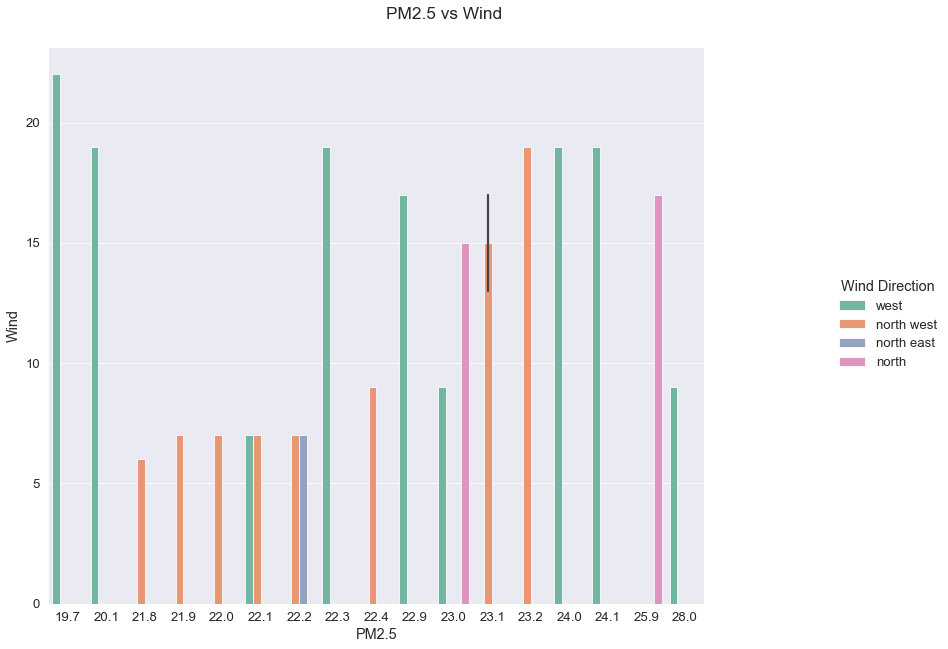

In [10]:
# Plot data for PM2.5
catplot("PM2.5")

<br>

It needs to be mentioned that PM10 and PM2.5 were at their highest at midnight when the wind was the lowest. However, since there are other faction for PM10 and PM2.5 levels to rise and the data on such factors is lacking, I cannot make any conclusions on why exactly they were high.

___

<br>

### Distribution fitting.

In fitting data on air pollution, there are many acceptable distribution models depending on the areas of study. According to International Journal of Engineering & Technology among the most used distributions are: 
* **gamma**, 
* **lognormal**,
* **weibull**,
* **beta**,
* **gumble**.  [6]

However, this is according only to one source. In order to find which distribution fits best our data we should go over the list of available to us distributions and then perform test the goodness of fit. Below I will be using a widely used option Kolmogorov–Smirnov test. 

Prior to fitting any distributions to our data, it would be wise to first visuallize it by plotting a histogram. [7]

> [6] [International Journal of Engineering & Technology: Fitting Statistical Distribution on Air Pollution: An Overview](https://www.researchgate.net/publication/329267591_Fitting_Statistical_Distribution_on_Air_Pollution_An_Overview)
<br>
[7] [Medium: Distribution Fitting with Python SciPy](https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed)

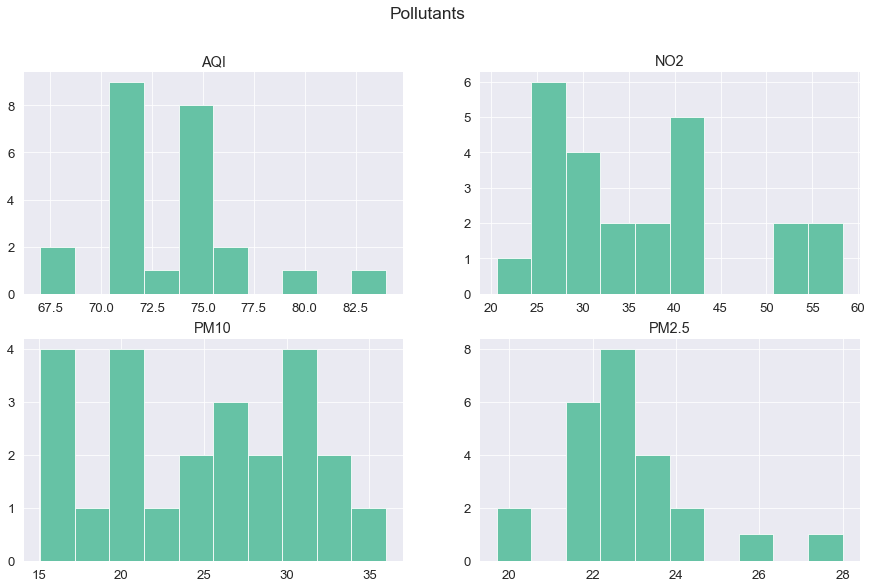

In [20]:
# Create a figure and a set of subplots 2x2.
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2,2)

#Set a title.
fig.suptitle("Pollutants")

def hist(data, ax):
    """ Fuction to build a histogram"""
    # Plot data.
    ax.hist(df[data])
    # Set title.
    ax.set_title(f"{data}")

# Plot data.
hist('AQI',ax1)
hist('NO2',ax2)
hist('PM10',ax3)
hist('PM2.5',ax4)

# Show the plots.
plt.show()

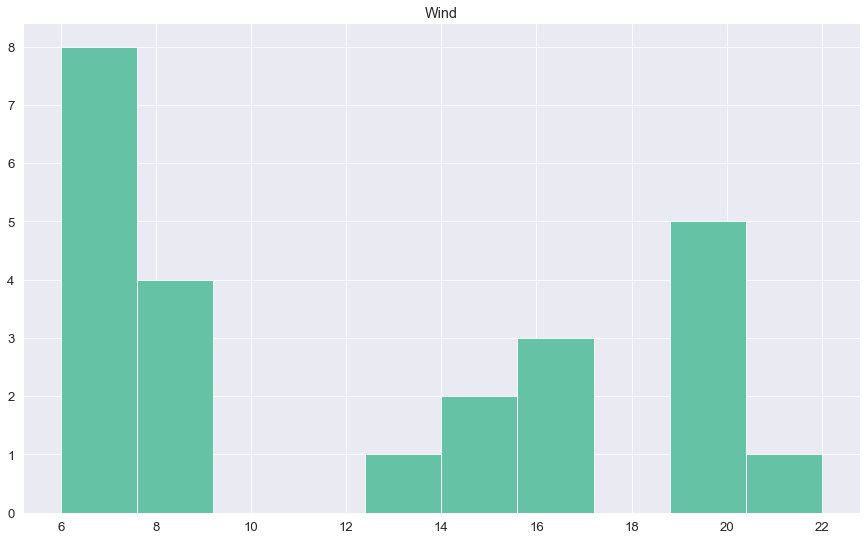

In [21]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot wind data.
hist("Wind", ax)

# Show the plot.
plt.show()

Now we can fit each of 87 available distributions to AQI and perform K-S test.

In [13]:
%%capture --no-stdout

# List of 87 distribution available on Scipy.
list_of_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

# Create an empty list.
results = []

# Loop through each distribution.
for i in list_of_dists:
    dist = getattr(stats, i)
    # Fit it to the data.
    param = dist.fit(df['AQI'])
    # Perform Kolmogorov–Smirnov test
    a = stats.kstest(df['AQI'], i, args=param)
    # Append results to the list.
    results.append((i,a[0],a[1]))
    
# Sort results by the lowest statistic.
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    # Print results.
    print(f"{j[0]}: statistic={j[1]}, pvalue={j[2]}")

laplace: statistic=0.17604399988392794, pvalue=0.40301060386742177
johnsonsu: statistic=0.18763881490496703, pvalue=0.32619168218993855
hypsecant: statistic=0.18963645012427643, pvalue=0.31409709896584626
loglaplace: statistic=0.18993290789719824, pvalue=0.3123302416861034
foldcauchy: statistic=0.1951248865529729, pvalue=0.28254596858308056
cauchy: statistic=0.197972276142918, pvalue=0.26712833567760497
dweibull: statistic=0.19859319079158266, pvalue=0.2638510214623609
fisk: statistic=0.19961065765140484, pvalue=0.2585455704681053
burr12: statistic=0.20590365700228097, pvalue=0.2274914785528675
logistic: statistic=0.2089175873853747, pvalue=0.2136649732261
burr: statistic=0.2097729051853333, pvalue=0.20986138734726476
mielke: statistic=0.20980429634695175, pvalue=0.2097227914785999
genlogistic: statistic=0.21422686318889705, pvalue=0.19089351510291816
exponnorm: statistic=0.21499566720482033, pvalue=0.18775928192224792
vonmises_line: statistic=0.21510832188380458, pvalue=0.187303416111

We can see that laplace distribution will fit AQI data best. Let's import the distribution and then buid a plot. [8]

> [8] [Stack OVerflow: Distribution Fitting with Sum of Square Error (SSE)](https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1)

In [14]:
# import laplace distribution
from scipy.stats import laplace

In [15]:
def make_pdf(dist, params, size=8760):
    """Generate distributions's Probability Distribution Function"""

    # Separate parts of parameters.
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get start and end points of distribution.
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series.
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [16]:
def plot_data_with_pdf_fitted(data, dist):
    """Plot generation """

    # Fit distribution.
    params = dist.fit(data)
    
    # Call a function to make PDF
    pdf = make_pdf(dist, params)
    
    # Plot the PDF
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    
    # Plot the data on the same axis.
    data.plot(kind='hist', density=True, alpha=0.5, label='Data', legend=True, ax=ax)
    
    # Show the plot.
    plt.show()

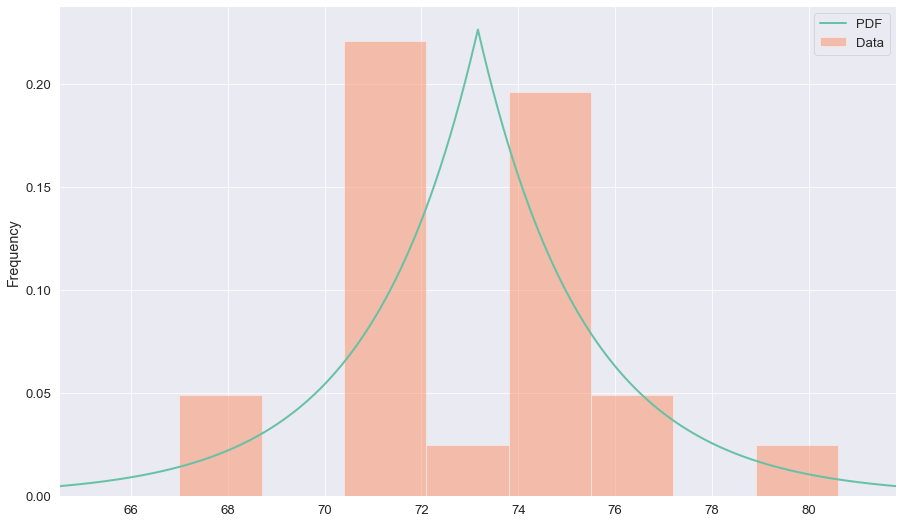

In [17]:
# Plot AQI with laplace distribution fitted.
plot_data_with_pdf_fitted(df["AQI"], laplace)

___

<br>

### Plotting.